In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [39]:
df1 = pd.read_excel('datos_apartamentos_rent.xlsx')
df1.describe()

,id,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
count,1.000000e+04,9966.000000,9993.000000,10000.000000,10000.000000,9990.000000,9990.000000,1.000000e+04
mean,5.623396e+09,1.380544,1.744021,1486.277500,945.810500,37.695162,-94.652247,1.574891e+09
std,7.021025e+07,0.615410,0.942354,1076.507968,655.755736,5.495851,15.759805,3.762395e+06
min,5.508654e+09,1.000000,0.000000,200.000000,101.000000,21.315500,-158.022100,1.568744e+09
25%,5.509248e+09,1.000000,1.000000,949.000000,649.000000,33.679850,-101.301700,1.568781e+09
50%,5.668610e+09,1.000000,2.000000,1270.000000,802.000000,38.809800,-93.651600,1.577358e+09
75%,5.668626e+09,2.000000,2.000000,1695.000000,1100.000000,41.349800,-82.209975,1.577359e+09
max,5.668663e+09,8.500000,9.000000,52500.000000,40000.000000,61.594000,-70.191600,1.577362e+09


In [40]:
#El price_type puede ser Monthly o Weekly. Por esto algunos prices estan en temporalidad semanal
#Se multiplica por 4 los prices cuyo price-type es weekly para que pueda ser tomado como mensual
df1.loc[df1["price_type"] == "Weekly", "price"] *= 4

In [41]:
#se seleccionan solo las columnas price, square feet, time
colfiltrar = [ "square_feet","price", "time"]
columnasfiltradas = df1[colfiltrar]

#cuartil1,cuartil3 y rango intercuartil
cuartil1 = columnasfiltradas.quantile(0.25)
cuartil3 = columnasfiltradas.quantile(0.75)
IQR = cuartil3 - cuartil1


limsuperior = cuartil3 + 1.5 * IQR
liminferior = cuartil1 - 1.5 * IQR

# se seleccionan los valores segun los limites
df = df1[~((columnasfiltradas < liminferior) | (columnasfiltradas > limsuperior)).any(axis=1)]

#Guardar en un excel nuevo para revisar
#df.to_excel("datossinoutliers.xlsx", index=False, engine="openpyxl")



In [42]:
#solo hay 10 datos null de latitude y longitude. 
# Por lo tanto se decide eliminar las 10 filas donde esta null en latitude/longitude

#eliminar datos de filas null en latitude
df = df.dropna(subset=["latitude"])

#eliminar datos de filas null en longitude
df = df.dropna(subset=["longitude"])

df.shape


(8939, 22)

In [43]:
#Se detectaron datos null de ciudad y estado que pertenecen a las coordenadas 39.8163,-98.5576
#por lo tanto se reemplaza por la ciudad y estado de esta coordenada 
#Se busco en google maps lo cual coincidio con Lebanon, Kansas

# Reemplazar los valores NaN con Lebanon en ciudad
df['cityname'].fillna('Lebanon', inplace=True)

# Reemplazar los valores NaN con KS en el Estado
df['state'].fillna('KS', inplace=True)

#Se detectaron datos null de ciudad y estado que pertenecen a las coordenadas 28.459,-82.1971
#por lo tanto se reemplaza por la ciudad y estado de esta coordenada 
#Se busco en google maps lo cual coincidio con Trilby, FL
#Trilby

df.loc[df["cityname"].isna() & (df["latitude"] == 28.459) & (df["longitude"] == -82.1971), "cityname"] = "Trilby"
df.loc[df["state"].isna() & (df["latitude"] == 28.459) & (df["longitude"] == -82.1971), "state"] = "FL"

C:\Users\arced\AppData\Local\Temp\ipykernel_50388\4135025618.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cityname'].fillna('Lebanon', inplace=True)
C:\Users\arced\AppData\Local\Temp\ipykernel_50388\4135025618.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [44]:
%matplotlib inline

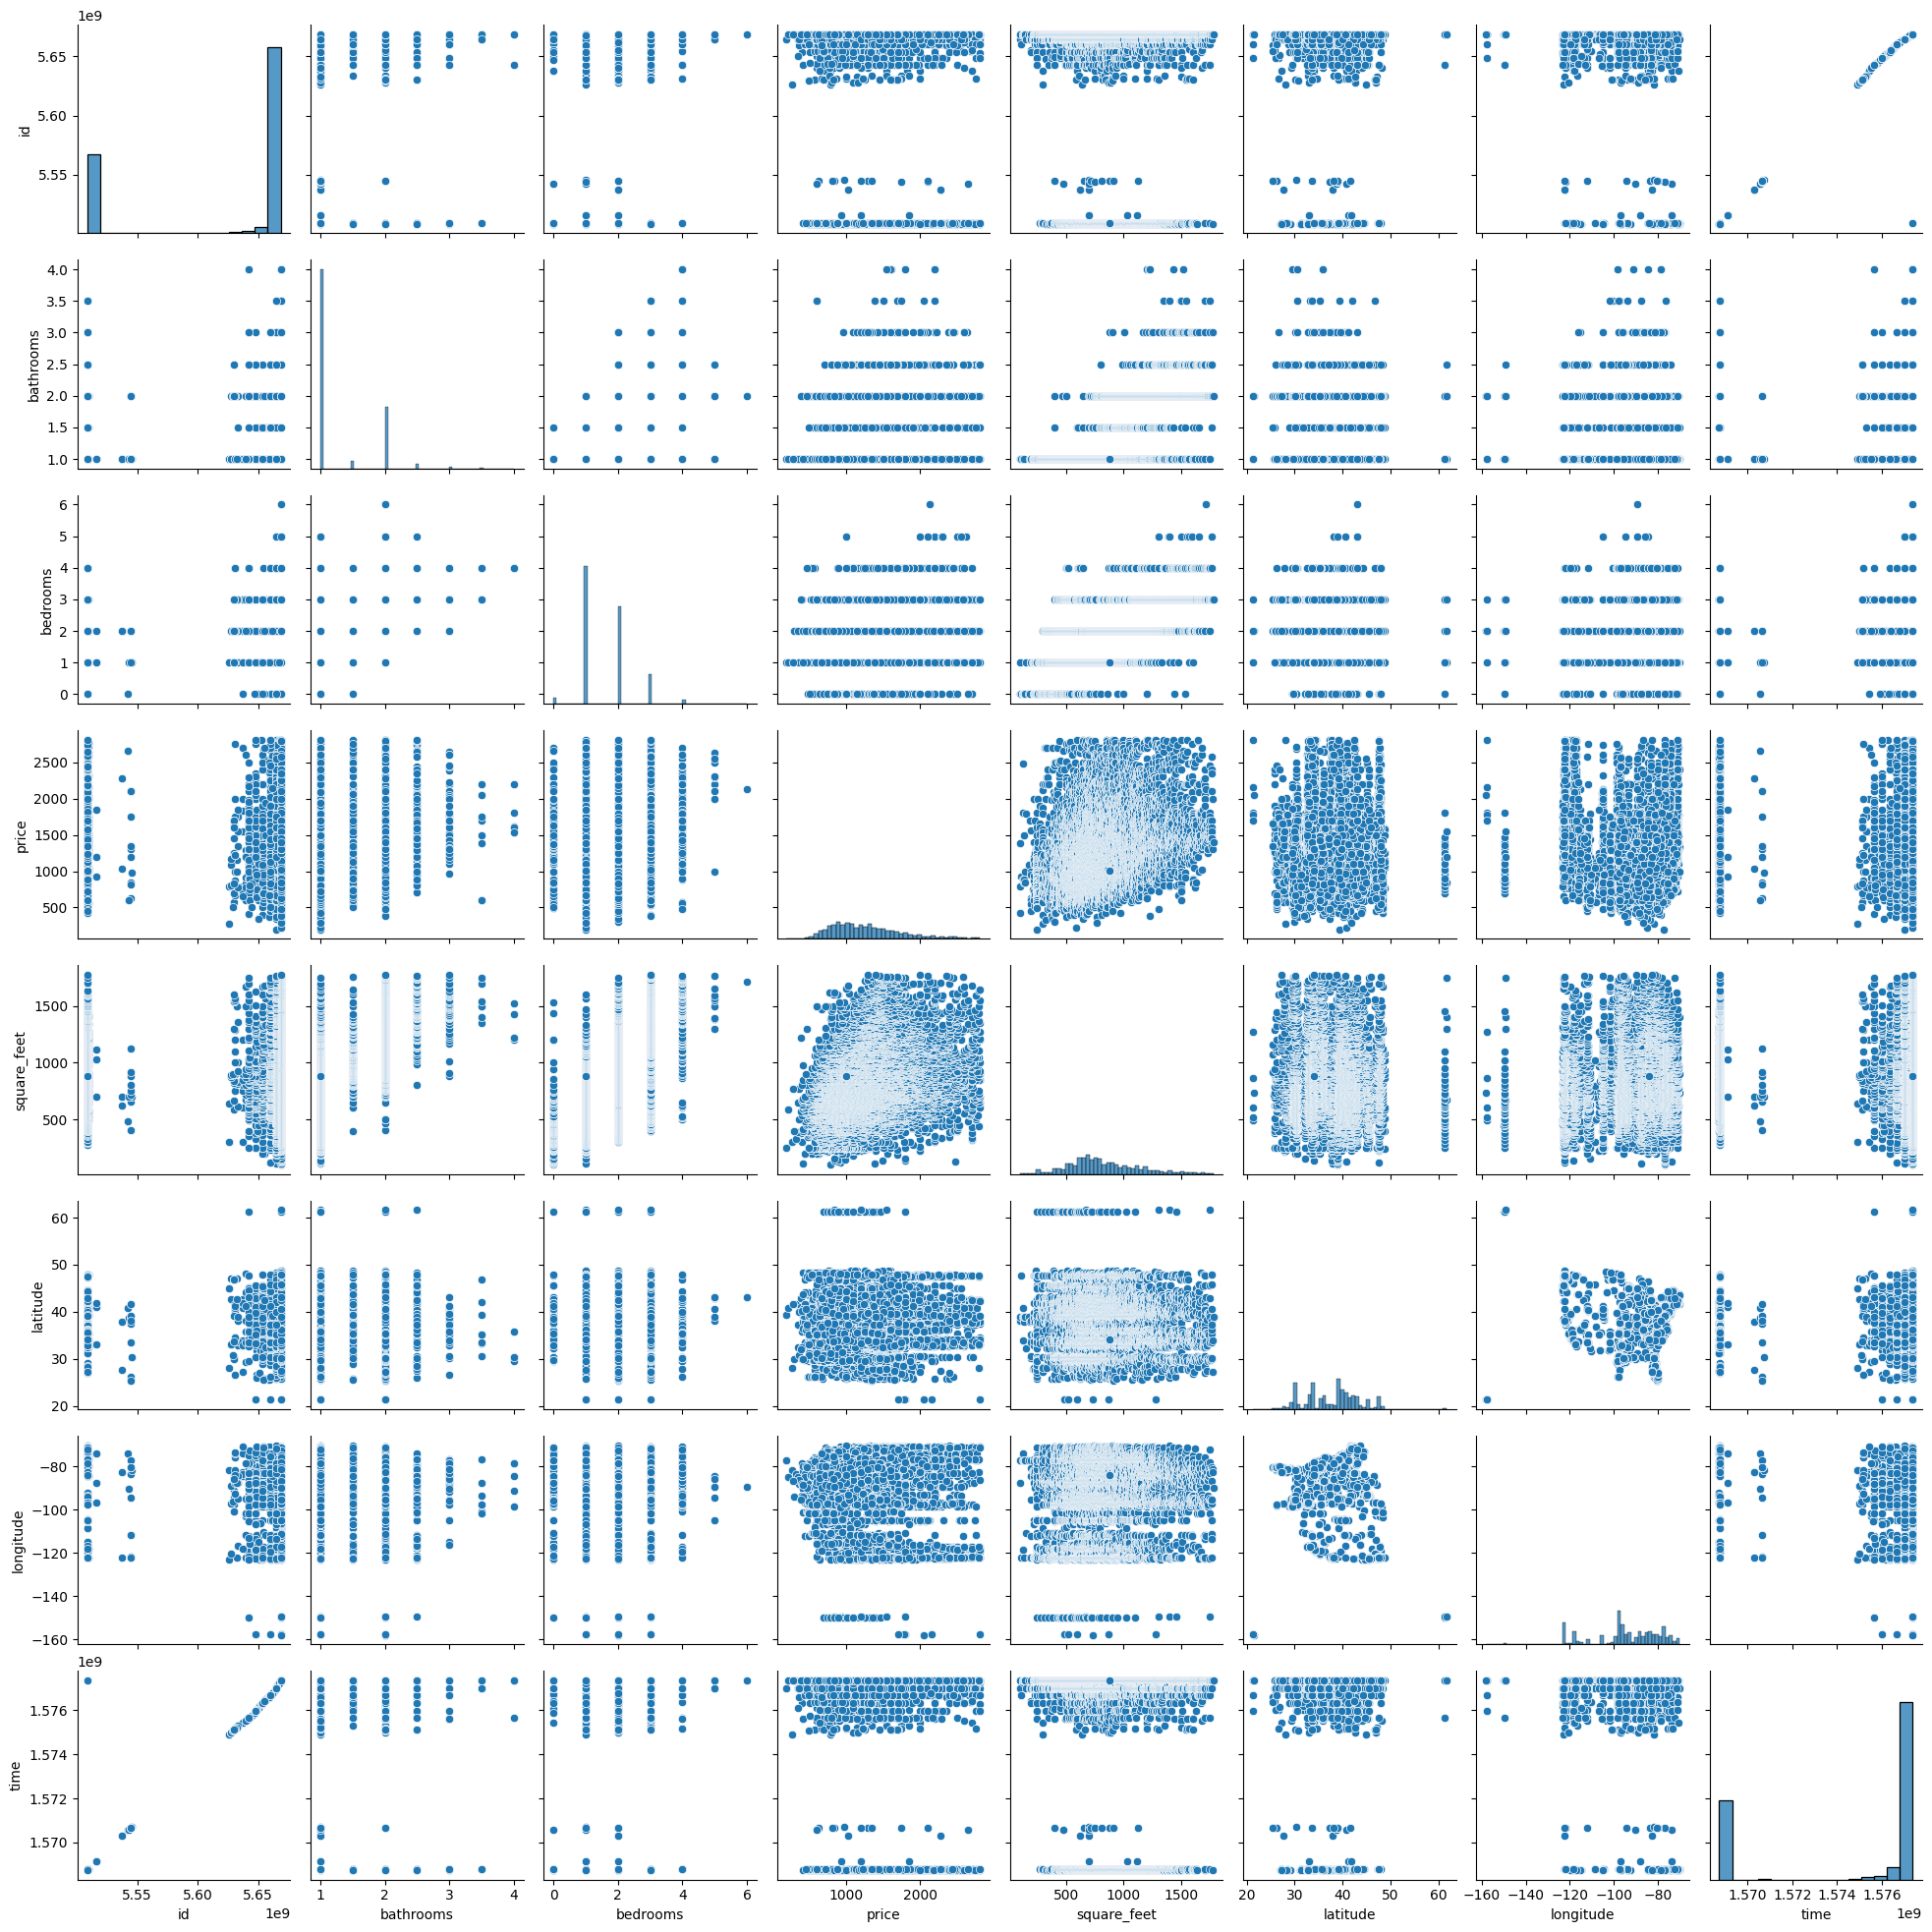

In [45]:
sns.pairplot(df,)

<Axes: >

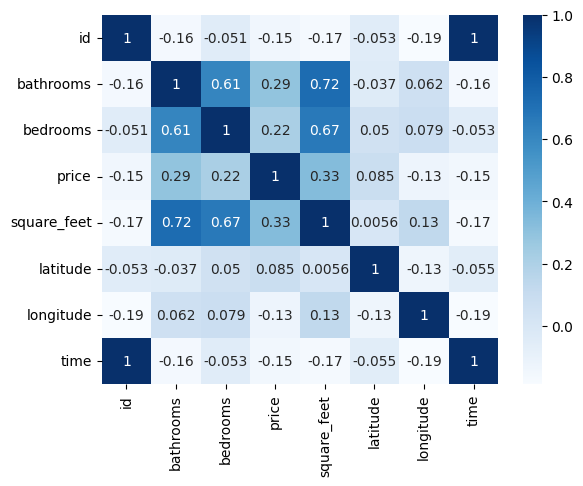

In [46]:
#correlacion para variables numericas
corr = df.corr(numeric_only=True)  
sns.heatmap(corr, cmap="Blues", annot=True)

<Axes: >

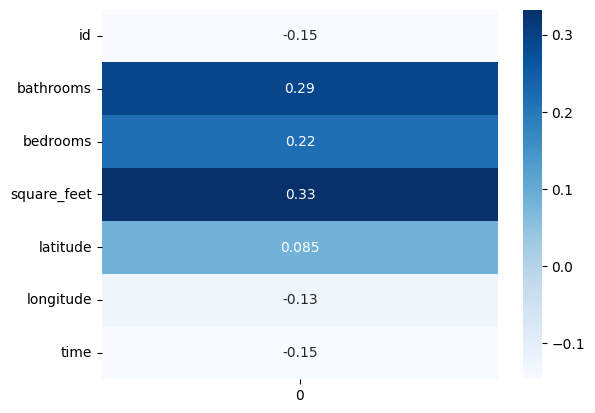

In [47]:
corrw = df.drop(['price', 'amenities'], axis=1).corrwith(df['price'], numeric_only=True)
sns.heatmap(pd.DataFrame(corrw), cmap="Blues", annot=True)

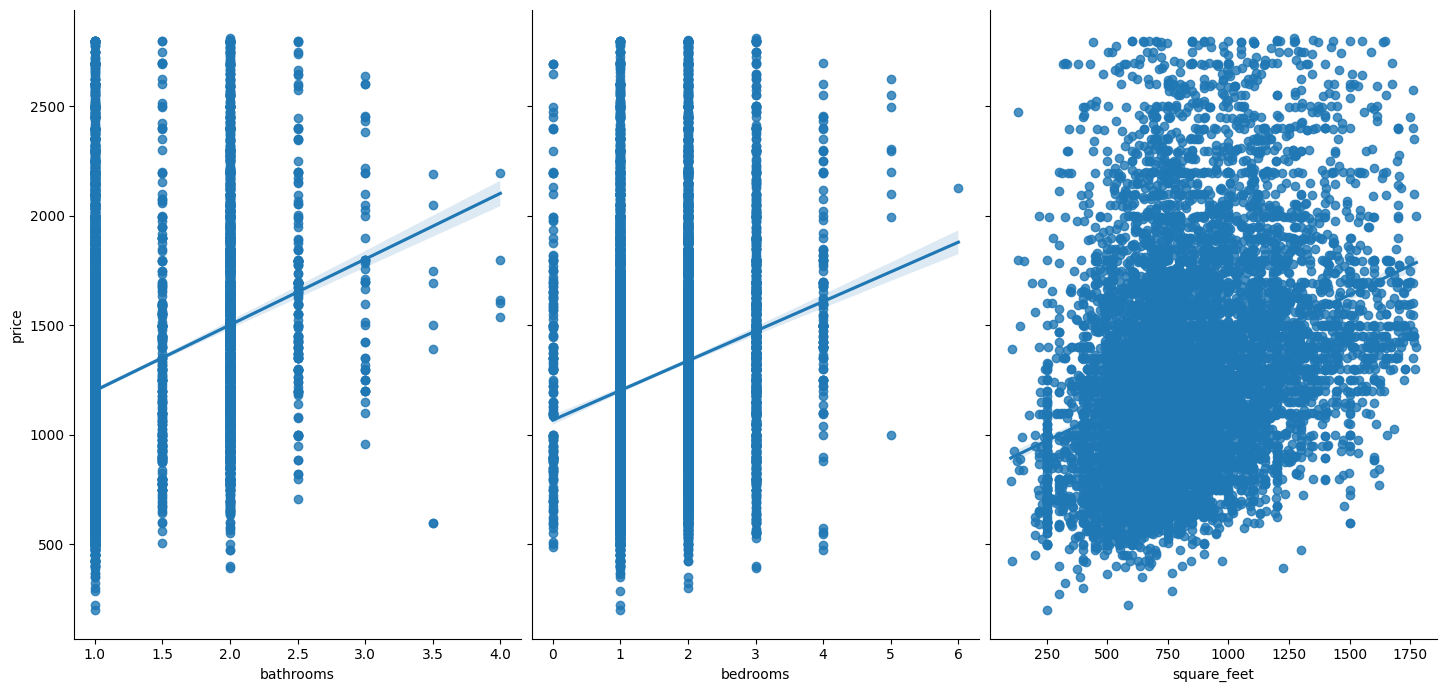

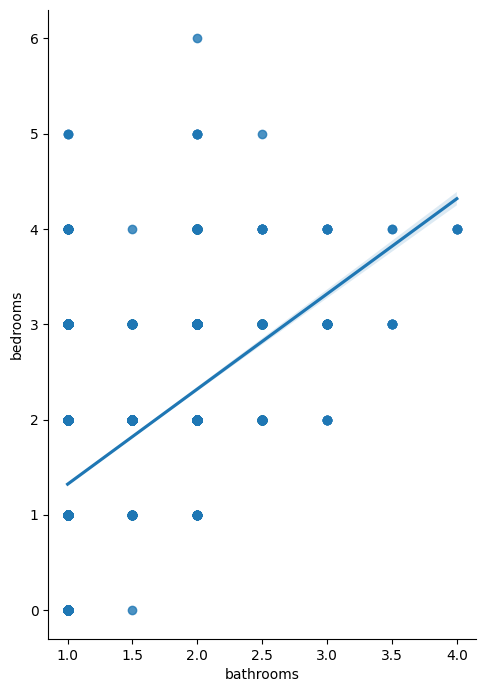

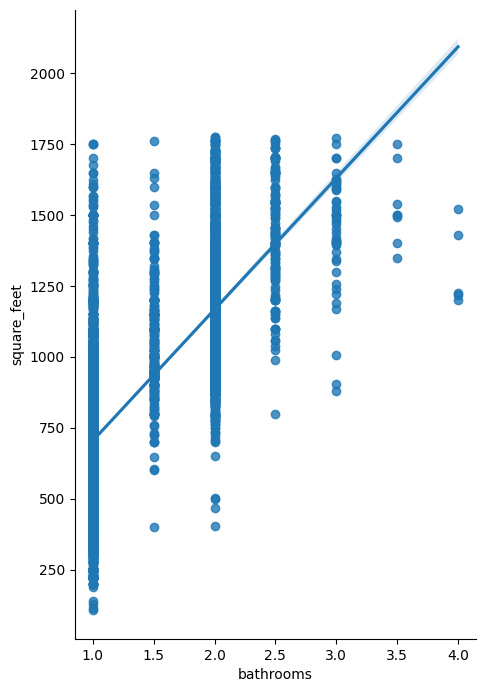

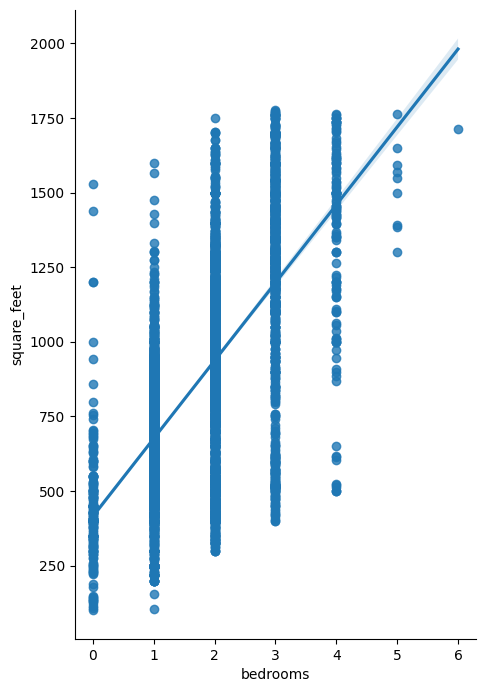

In [48]:
sns.pairplot(df, x_vars=['bathrooms','bedrooms','square_feet'], y_vars='price', height=7, aspect=0.7, kind='reg')
sns.pairplot(df, x_vars=['bathrooms'], y_vars='bedrooms', height=7, aspect=0.7, kind='reg')
sns.pairplot(df, x_vars=['bathrooms'], y_vars='square_feet', height=7, aspect=0.7, kind='reg')
sns.pairplot(df, x_vars=['bedrooms'], y_vars='square_feet', height=7, aspect=0.7, kind='reg')

In [49]:
df.describe()

,id,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
count,8.939000e+03,8910.000000,8933.000000,8939.000000,8939.000000,8939.000000,8939.000000,8.939000e+03
mean,5.621104e+09,1.277722,1.596888,1283.489093,831.843830,37.745092,-93.972328,1.574770e+09
std,7.137500e+07,0.472920,0.774177,486.941657,303.541291,5.566135,15.168417,3.825170e+06
min,5.508654e+09,1.000000,0.000000,200.000000,101.000000,21.315500,-158.022100,1.568744e+09
25%,5.509230e+09,1.000000,1.000000,915.000000,630.000000,33.529250,-98.525300,1.568780e+09
50%,5.668609e+09,1.000000,1.000000,1200.000000,777.000000,38.911800,-93.627600,1.577358e+09
75%,5.668625e+09,1.500000,2.000000,1554.000000,1000.000000,41.507300,-82.195450,1.577359e+09
max,5.668643e+09,4.000000,6.000000,2810.000000,1776.000000,61.594000,-70.191600,1.577362e+09


In [50]:
#en las variables numericas donde hay datos faltantes se cambia el dato faltante por el promedio segun square_feet dada la correlacion

#BATHROOMS
# Calcular el promedio de bathrooms donde square_feet menor a  837.5 y bathrooms no sea null
prombathrooms_inf = df.loc[df["square_feet"] < 837.5, "bathrooms"].mean()

# Redondear al múltiplo de 0.5 más cercano
promredondeado = round(prombathrooms_inf * 2) / 2

# Reemplazar valores null en "bathrooms" solo si el square_feet < 837.5
df.loc[df["bathrooms"].isna() & (df["square_feet"] < 837.5), "bathrooms"] = promredondeado


# Calcular el promedio de bathrooms donde square_feet mayor a  837.5 y bathrooms no sea null
prombathrooms_sup = df.loc[df["square_feet"] > 837.5, "bathrooms"].mean()

# Redondear al múltiplo de 0.5 más cercano
promredondeado2 = round(prombathrooms_sup * 2) / 2

# Reemplazar valores null en "bathrooms" solo si el square_feet < 837.5
df.loc[df["bathrooms"].isna() & (df["square_feet"] > 837.5), "bathrooms"] = promredondeado2


#BEDROOMS
# Calcular el promedio de bedrooms donde square_feet menor a  837.5 y bedrooms no sea null
prombedrooms_inf = df.loc[df["square_feet"] < 837.5, "bedrooms"].mean()

# Redondear al múltiplo de 0.5 más cercano
promredondeadobed = round(prombedrooms_inf * 2) / 2

# Reemplazar valores null en "bedrooms" solo si el square_feet < 837.5
df.loc[df["bedrooms"].isna() & (df["square_feet"] < 837.5), "bedrooms"] = promredondeadobed


# Calcular el promedio de bedrooms donde square_feet mayor a  837.5 y bedrooms no sea null
prombedrooms_sup = df.loc[df["square_feet"] > 837.5, "bedrooms"].mean()

# Redondear al múltiplo de 0.5 más cercano
promredondeadobed2 = round(prombedrooms_sup * 2) / 2

# Reemplazar valores null en "bedrooms" solo si el square_feet < 837.5
df.loc[df["bedrooms"].isna() & (df["square_feet"] > 837.5), "bedrooms"] = promredondeadobed2

In [51]:
#en las variables no numericas donde hay datos faltantes se cambia el dato faltante por la moda

#moda pets_allowed
modapets_allowed = df['pets_allowed'].mode()[0]

# Reemplazar los valores null con la moda de pets_allowed
df['pets_allowed'].fillna(modapets_allowed, inplace=True)



C:\Users\arced\AppData\Local\Temp\ipykernel_50388\1831080958.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['pets_allowed'].fillna(modapets_allowed, inplace=True)


In [52]:
# Dividir las características por las comas y generar binarias
amenities_sep = df["amenities"].str.get_dummies(sep=",")

# agregar al dataframe
df2 = pd.concat([df, amenities_sep], axis=1)

# nuevo excel para revisar
#df2.to_excel("datosfinalesapartamentos.xlsx", index=False, engine="openpyxl")


Estadisticas descriptivas datos faltantes gestionados y sin outliers

In [53]:
df2.describe()

,id,bathrooms,bedrooms,price,square_feet,latitude,longitude,time,AC,Alarm,...,Patio/Deck,Playground,Pool,Refrigerator,Storage,TV,Tennis,View,Washer Dryer,Wood Floors
count,8.939000e+03,8939.0000,8939.000000,8939.000000,8939.000000,8939.000000,8939.000000,8.939000e+03,8939.000000,8939.000000,...,8939.000000,8939.000000,8939.000000,8939.000000,8939.000000,8939.000000,8939.000000,8939.000000,8939.000000,8939.000000
mean,5.621104e+09,1.2771,1.596711,1283.489093,831.843830,37.745092,-93.972328,1.574770e+09,0.070030,0.002237,...,0.261774,0.086699,0.350599,0.319499,0.164895,0.022262,0.053026,0.015326,0.113659,0.035686
std,7.137500e+07,0.4724,0.774044,486.941657,303.541291,5.566135,15.168417,3.825170e+06,0.255212,0.047251,...,0.439625,0.281409,0.477184,0.466309,0.371107,0.147543,0.224098,0.122853,0.317415,0.185517
min,5.508654e+09,1.0000,0.000000,200.000000,101.000000,21.315500,-158.022100,1.568744e+09,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.509230e+09,1.0000,1.000000,915.000000,630.000000,33.529250,-98.525300,1.568780e+09,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.668609e+09,1.0000,1.000000,1200.000000,777.000000,38.911800,-93.627600,1.577358e+09,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.668625e+09,1.5000,2.000000,1554.000000,1000.000000,41.507300,-82.195450,1.577359e+09,0.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.668643e+09,4.0000,6.000000,2810.000000,1776.000000,61.594000,-70.191600,1.577362e+09,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
#valores unicos columna has_photo
unicoshas_photo = df2['has_photo'].unique()
print ("unicos has_photo=", unicoshas_photo)

#veces que aparecen los únicos de columna has_photo
df2.groupby(['has_photo']).count()

contarhas_photo = df2['has_photo'].value_counts()
print("contar has_photo=", contarhas_photo)

unicos has_photo= ['Thumbnail' 'Yes' 'No']
contar has_photo= has_photo
Thumbnail    7914
Yes           859
No            166
Name: count, dtype: int64


In [55]:
#valores unicos columna cityname
unicoscityname = df2['cityname'].unique()
print ("unicos cityname=", unicoscityname)

#veces que aparecen los únicos de columna cityname
df2.groupby(['cityname']).count()

#se extrajeron las 5 ciudades que mas se repiten debido a la gran cantidad de estados
contarcityname = df['cityname'].value_counts().head()
print("contar cityname=", contarcityname)

#aca se muestran todos las ciudades en caso de que se necesite ver las veces que se repite cada uno
contarcityname1 = df['cityname'].value_counts()
print("contar cityname todos=", contarcityname1)


unicos cityname= ['Washington' 'Evansville' 'Arlington' ... 'American Canyon' 'Belgrade'
 'Locust']
contar cityname= cityname
Austin         521
Dallas         208
Houston        181
San Antonio    177
Chicago        131
Name: count, dtype: int64
contar cityname todos= cityname
Austin             521
Dallas             208
Houston            181
San Antonio        177
Chicago            131
                  ... 
American Canyon      1
Saint Johns          1
Mustang              1
Morrow               1
Grandy               1
Name: count, Length: 1441, dtype: int64


In [56]:
#valores unicos columna state
unicosstate = df2['state'].unique()
print ("unicos state=", unicosstate)

#veces que aparecen los únicos de columna state
df2.groupby(['state']).count()

#se extrajeron los 5 estados que mas se repiten debido a la gran cantidad de estados
contarstate = df2['state'].value_counts().head()
print("contar state=", contarstate)

#aca se muestran todos los estados en caso de que se necesite ver las veces que se repite cada uno
contarstate1 = df2['state'].value_counts()
print("contar state todos=", contarstate1)

unicos state= ['DC' 'IN' 'VA' 'WA' 'NY' 'CA' 'AZ' 'NC' 'TX' 'GA' 'FL' 'AL' 'MD' 'CO'
 'NM' 'IL' 'TN' 'AK' 'MA' 'KS' 'NJ' 'OR' 'DE' 'PA' 'IA' 'SC' 'MN' 'MI'
 'KY' 'WI' 'OH' 'CT' 'RI' 'NV' 'UT' 'MO' 'OK' 'NH' 'NE' 'LA' 'ND' 'AR'
 'ID' 'HI' 'MT' 'VT' 'SD' 'WV' 'MS' 'ME' 'WY']
contar state= state
TX    1674
CA     620
WA     475
MD     412
NC     396
Name: count, dtype: int64
contar state todos= state
TX    1674
CA     620
WA     475
MD     412
NC     396
GA     336
NJ     329
OH     300
CO     298
WI     294
FL     291
IL     258
MO     230
IN     213
MN     212
VA     185
PA     175
IA     174
OR     168
OK     162
MI     155
KS     136
MA     130
AZ     115
ND     107
NV     105
NE     101
CT      97
TN      84
UT      71
NH      69
DC      66
NY      62
SD      61
LA      60
SC      55
AR      51
AL      45
AK      43
KY      39
ID      18
VT      15
NM      14
RI      10
MS       9
HI       6
MT       5
DE       3
WV       2
ME       2
WY       1
Name: count, dtype: int64


In [57]:
#valores unicos columna pets_allowed
unicospets_allowed = df2['pets_allowed'].unique()
print ("unicos pets_allowed=", unicospets_allowed)

#veces que aparecen los únicos de columna pets_allowed
df2.groupby(['pets_allowed']).count()

contarpets_allowed = df2['pets_allowed'].value_counts()
print("contar pets_allowed=", contarpets_allowed)

unicos pets_allowed= ['Cats,Dogs' 'Cats' 'Dogs']
contar pets_allowed= pets_allowed
Cats,Dogs    8415
Cats          453
Dogs           71
Name: count, dtype: int64


In [58]:
#valores unicos columna source
unicossource = df2['source'].unique()
print ("unicos source=", unicossource)

#veces que aparecen los únicos de columna source
df2.groupby(['source']).count()

contarsource = df2['source'].value_counts()
print("contar source=", contarsource)

unicos source= ['RentLingo' 'Listanza' 'RentDigs.com' 'ListedBuy' 'GoSection8'
 'RealRentals' 'RENTOCULAR' 'rentbits' 'Home Rentals' 'Real Estate Agent'
 'RENTCafé' 'tenantcloud']
contar source= source
RentLingo            6031
RentDigs.com         2606
ListedBuy             169
RealRentals            66
GoSection8             30
Listanza               18
RENTOCULAR             13
rentbits                2
Home Rentals            1
Real Estate Agent       1
RENTCafé                1
tenantcloud             1
Name: count, dtype: int64
